# Naive Bayes Example 1

## Spam/ Ham Detector

In [1]:
import nltk

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

## Importing Data

In [5]:
messages = [line.rstrip() for line in open('../../../Datasets/NLP/smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


In [7]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [8]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

### Converting TSV (Tab Seperated Value) to DF

In [9]:
messages = pd.read_csv('../../Datasets/NLP/smsspamcollection/SMSSpamCollection', 
                       sep='\t', 
                       names=['label', 'message'])

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
messages['length'] = messages['message'].apply(len)

In [17]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## EDA

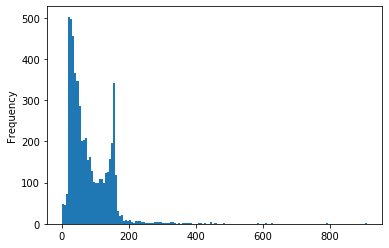

In [20]:
messages['length'].plot.hist(bins=150)  # Bimodal Behaviour

In [21]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

#### Finding the Longest Message

In [25]:
messages[messages['length'] == 910]['message'].values

array(["For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."],
      dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a269498d0>,
      dtype=object)

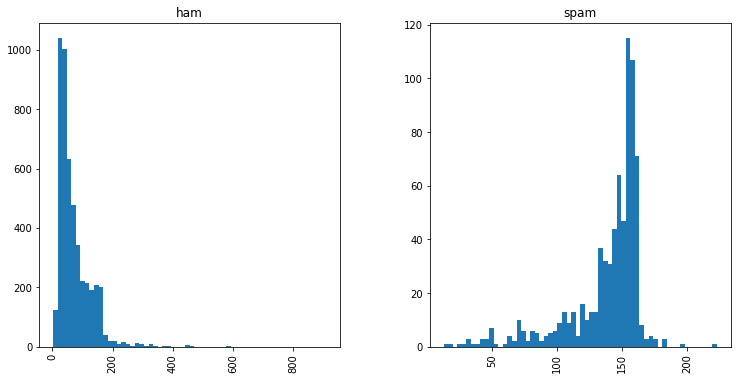

In [27]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 6))

#### Length of Spam Messages is usually more than Ham

# Word Tockenize

## Removing Punctuations

In [29]:
mess = 'Sample Message! Notice: It has punctuation'

In [34]:
nopunc = [c for c in mess if c not in string.punctuation]

In [38]:
nopunc = ''.join(nopunc)

In [39]:
nopunc

'Sample Message Notice It has punctuation'

## Removing Stopwords (Common Words)

In [36]:
from nltk.corpus import stopwords

In [42]:
rm_sws = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [43]:
rm_sws  # Removed 'It' and 'has'

['Sample', 'Message', 'Notice', 'It', 'punctuation']

## Making Function to apply on Whole DataFrame

In [47]:
def text_process(sentence):
    nopunc = [c for c in sentence if c not in string.punctuation]
    nopunc = ''.join(nopunc)
    rm_sws = [word for word in nopunc.split() if word not in stopwords.words('english')]
    
    return rm_sws

In [48]:
messages['message'].head(5).apply(text_process)  # Example

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, I, dont, think, goes, usf, lives, around...
Name: message, dtype: object

# Stemming

## Bring Simillar Word in same for like run, ran, running

# Vectorize

## Bag-of-Words Model

1. Count how many times does a word occur in each message (Known as term frequency)
    - TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
    

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
    - IDF(t) = log_e(Total number of documents / Number of documents with term t in it)
    

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


**This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.**

Example- Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>

Note- Sklean return a Sparse Matrix

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

In [50]:
model = CountVectorizer(analyzer=text_process)

In [53]:
model.fit(messages['message'])

In [55]:
print(len(bow.vocabulary_))

11617


##### Example-

In [57]:
mess4 = messages['message'][3]

In [58]:
print(mess4)

U dun say so early hor... U c already then say...


In [60]:
bow4 = model.transform([mess4])

In [61]:
print(bow4)

  (0, 4221)	2
  (0, 4821)	1
  (0, 5453)	1
  (0, 6396)	1
  (0, 6414)	1
  (0, 7378)	1
  (0, 9746)	2


In [62]:
bow4.shape

(1, 11617)

In [68]:
tfidf_transformed = model.transform(messages['message'])

## Model Training

### Naïve Bayes

In [66]:
from sklearn.naive_bayes import MultinomialNB

In [67]:
model2 = MultinomialNB()

In [72]:
model2.fit(tfidf_transformed, messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Model Testing

In [73]:
msg = 'CONGRATS You have won 5000 Dollars. Reply to this to Avail your Prize!'

In [75]:
model2.predict(model.transform([msg]))

array(['spam'], dtype='<U4')

## Model Evaluation

In [77]:
y_p = model2.predict(tfidf_transformed)

In [76]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(messages['label'], y_p))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      4825
        spam       0.98      0.98      0.98       747

    accuracy                           0.99      5572
   macro avg       0.99      0.99      0.99      5572
weighted avg       0.99      0.99      0.99      5572

